# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
api_key = weather_api_key
units = "imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

print(query_url)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
data = []
cloudiness = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
windSpeed = []
countries = []

for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        countries.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        windSpeed.append(response['wind']['speed'])
        data.append(response['name'])
        cloudiness.append(response['clouds']['all'])

            
    except Exception:
        print('Unknown city...Skip')
print('Done')

Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip
Unknown city...Skip


In [48]:
print(f'data: {len(data)}, cloud: {len(cloudiness)}, date: {len(date)}, humidity: {len(humidity)}, lat: {len(lat)}, lng: {len(lng)}, max: {len(max_temp)}, wind: {len(windSpeed)}, country: {len(countries)}')

data: 571, cloud: 571, date: 571, humidity: 571, lat: 571, lng: 571, max: 571, wind: 571, country: 571


In [66]:
weather_df = {"City": data, "Cloudiness": cloudiness, "Country": countries, "Date": date, "Humidity": humidity, "Lat": lat, "Lng": lng,"Max Temp": max_temp,"Wind Speed": windSpeed}
weather_df = pd.DataFrame(weather_df)

In [50]:
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Souris,40,CA,1617938443,75,49.6172,-100.2612,45.00,9.22
1,Norman,1,US,1617938444,36,35.2226,-97.4395,66.99,10.36
2,Maragogi,89,BR,1617938444,74,-9.0122,-35.2225,79.57,8.97
3,Aykhal,98,RU,1617938445,90,66.0000,111.5000,2.48,23.73
4,Christchurch,100,NZ,1617938445,56,-43.5333,172.6333,68.00,9.22
...,...,...,...,...,...,...,...,...,...
566,Mitzic,100,GA,1617938677,98,0.7821,11.5490,68.97,0.60
567,Manali,40,IN,1617938678,65,13.1667,80.2667,84.20,5.75
568,Kaihua,97,CN,1617938678,79,23.3687,104.2800,65.21,11.12
569,Pirovskoye,99,RU,1617938679,89,57.6267,92.2658,34.72,5.30


In [54]:
weather_df.to_csv('..\output_data\weather_df.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [60]:
#  Get the indices of cities that have humidity over 100%.
weather_df.drop(weather_df.loc[weather_df['Humidity'] > 100].index, inplace=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

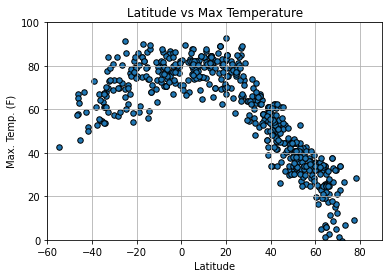

In [75]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker='o',s=30, edgecolors= "black")
plt.title("Latitude vs Max Temperature")

plt.ylim(0,100)
plt.xlim(-60, 90)

plt.ylabel("Max. Temp. (F)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig('../output_data/LatVsTemp.png')

## Latitude vs. Humidity Plot

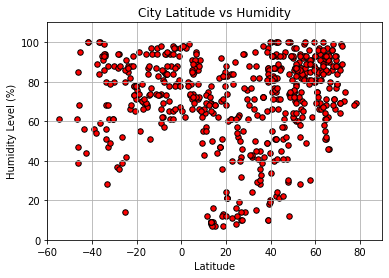

In [78]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker='o', s=30, edgecolors= "black", color= 'red')
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity Level (%)")
plt.xlabel("Latitude")
plt.ylim(0,110)
plt.xlim(-60, 90)
plt.grid()

plt.savefig('../output_data/LatVsHumidity.png')

## Latitude vs. Cloudiness Plot

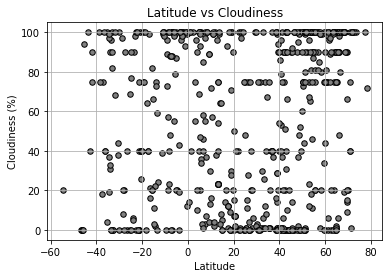

In [81]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker='o', s=30, edgecolors= "black", color= 'grey')
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig('../output_data/LatVsCloud.png')

## Latitude vs. Wind Speed Plot

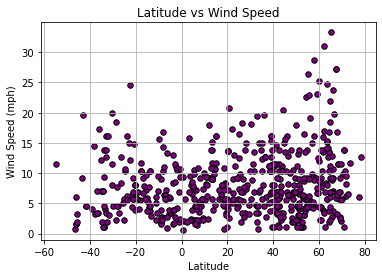

In [87]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker='o', s=30, edgecolors= "black", color='purple')
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig('../output_data/LatVsWind.png')

## Linear Regression

In [84]:
northern_df = weather_df.loc[weather_df["Lat"]>0.01]
southern_df = weather_df.loc[weather_df["Lat"]<-0.01]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

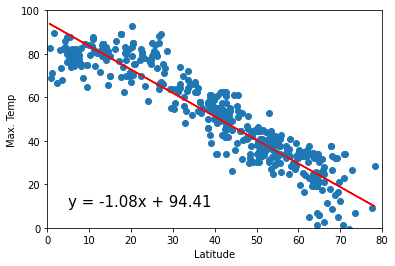

In [90]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="black")

plt.ylim(0,100)
plt.xlim(0, 80)
plt.ylabel("Max. Temp")
plt.xlabel("Latitude")

plt.savefig('../output_data/NorthTempVsLat.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

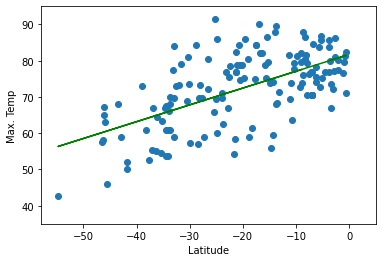

In [106]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"green")

plt.ylim(35, 95)
plt.xlim(-58, 5)
plt.ylabel("Max. Temp")
plt.xlabel("Latitude")

plt.savefig('../output_data/SouthTempVsLat.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

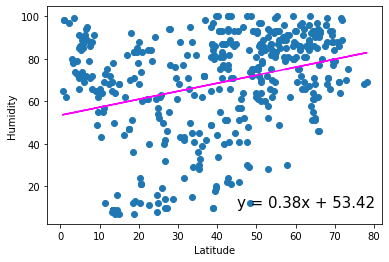

In [119]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"magenta")
plt.annotate(line_eq,(45,10),fontsize=15,color="black")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.savefig('../output_data/NorthHumidityVsLat.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

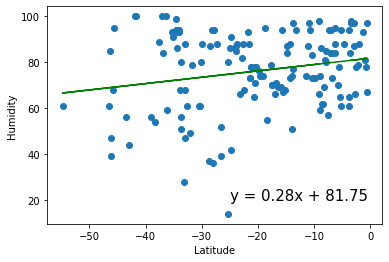

In [122]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"green")
plt.annotate(line_eq,(-25,20),fontsize=15,color="black")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.savefig('../output_data/SouthHumidityVsLat.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

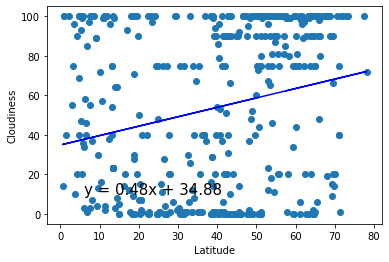

In [139]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"blue")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.savefig('../output_data/NorthCloudVsLat.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

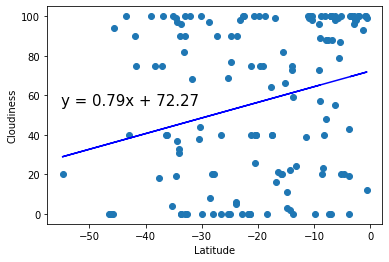

In [140]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"blue")
plt.annotate(line_eq,(-55,55),fontsize=15,color="black")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.savefig('../output_data/SouthCloudVsLat.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

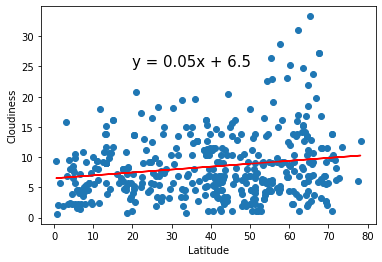

In [141]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(20,25),fontsize=15,color="black")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.savefig('../output_data/NorthWindVsLat.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

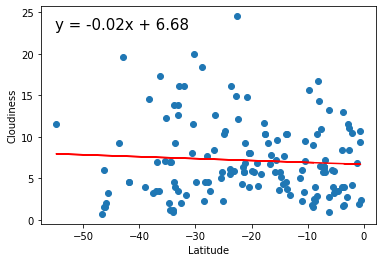

In [144]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-55,23),fontsize=15,color="black")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.savefig('../output_data/SouthWindVsLat.png')